In [1]:
# From: https://github.com/eodcgmbh/eodc-examples => tutorials => read_yipeeo_data.impy

import os
import geopandas as gpd
import contextily as cx
from owslib.ogcapi.features import Features
from rich.console import Console

import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import matplotlib.dates as mdates

console = Console()

EODC_OGCAPI_URL = 'https://features.dev.services.eodc.eu/'
eodc_ogcapi = Features(EODC_OGCAPI_URL)
console.print(eodc_ogcapi)

#collections = eodc_ogcapi.collections()
#console.print(collections)

feature_collections = eodc_ogcapi.feature_collections()
console.print(feature_collections)

# queryables = eodc_ogcapi.collection_queryables('Vlbg_EGMS_L3_U')
# console.print(queryables)

bbox = [9.7549833,47.4537861,9.7616428,47.4581097]

field_items = eodc_ogcapi.collection_items(
    "Vlbg_EGMS_L3_U",
    bbox = bbox,
    limit = 2000,
)
console.print(f"We found {len(field_items['features'])} items matching the query criteria.")

df = gpd.GeoDataFrame.from_features(field_items["features"], crs="EPSG:4326")


<owslib.ogcapi.features.Features object at 0x0000019CC3F8E790>

['adriatic_vessels', 'Vlbg_EGMS_L3_E', 'Vlbg_EGMS_L3_U', 'STATISTIK_AUSTRIA_DSR']

We found 24 items matching the query criteria.

In [2]:
df_sorted = df[sorted(df.columns)]
df_sorted.head()


,20160105,20160111,20160117,20160123,20160129,20160204,20160210,20160216,20160222,20160228,...,geometry,height,layer,mean_vel_1,mean_veloc,northing,path,rmse,seasonal_1,seasonalit
0,1.3,0.6,0.5,0.8,1.2,0.9,1.3,2.1,2.1,2.1,...,POINT (9.75550 47.45429),418.8,Zusammengefasster Layer,0.1,-4.2,2704550,"PointZ?crs=EPSG:3035&field=pid:string(0,0)&fie...",1.5,0.1,1.5
1,1.2,1.3,-0.6,-1.8,-0.9,0.4,1.7,2.5,2.0,1.7,...,POINT (9.75683 47.45429),417.3,Zusammengefasster Layer,0.1,-5.1,2704550,"PointZ?crs=EPSG:3035&field=pid:string(0,0)&fie...",1.7,0.1,1.4
2,2.7,0.6,2.8,1.4,-2.2,-2.3,-0.4,2.2,4.8,6.7,...,POINT (9.75816 47.45429),416.2,Zusammengefasster Layer,0.1,-9.3,2704550,"PointZ?crs=EPSG:3035&field=pid:string(0,0)&fie...",3.1,0.2,2.7
3,4.2,4.9,4.6,1.9,-1.8,-2.3,0.0,1.5,0.7,-0.7,...,POINT (9.75948 47.45429),415.9,Zusammengefasster Layer,0.1,-8.3,2704550,"PointZ?crs=EPSG:3035&field=pid:string(0,0)&fie...",3.6,0.2,2.1
4,1.4,1.2,0.7,0.0,-1.0,-0.8,0.7,1.4,1.7,2.1,...,POINT (9.76081 47.45430),413.2,Zusammengefasster Layer,0.0,-6.1,2704550,"PointZ?crs=EPSG:3035&field=pid:string(0,0)&fie...",1.1,0.1,1.7


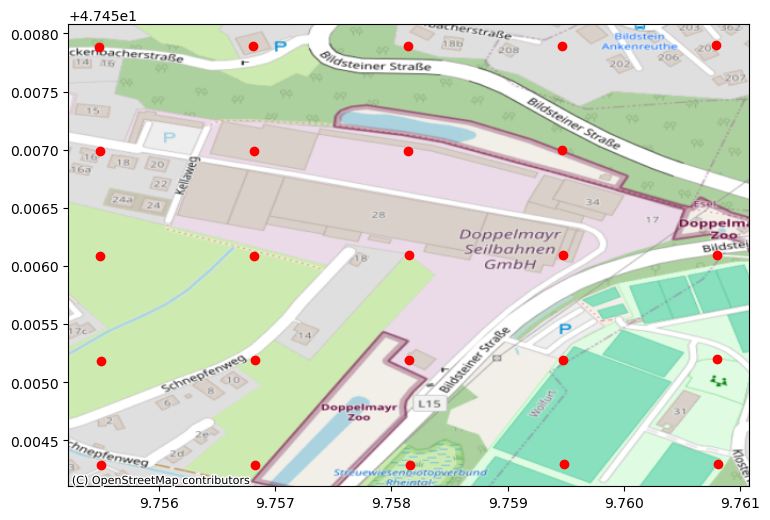

In [3]:
ax = df[["geometry"]].plot(
    facecolor="red", figsize=(12, 6)
)
cx.add_basemap(ax, crs=df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik);


In [9]:
df_np = df_sorted.to_numpy()
columns_names=list(df_sorted)
acquisition_dates = columns_names[0:363]
#print(acquisition_dates)

acquisition_date_str = [f"{d[:4]}-{d[4:6]}-{d[6:8]}" for d in acquisition_dates]
acquisition_date_num = [datetime.strptime(d, "%Y-%m-%d") for d in acquisition_date_str]
#print(acquisition_date_num)

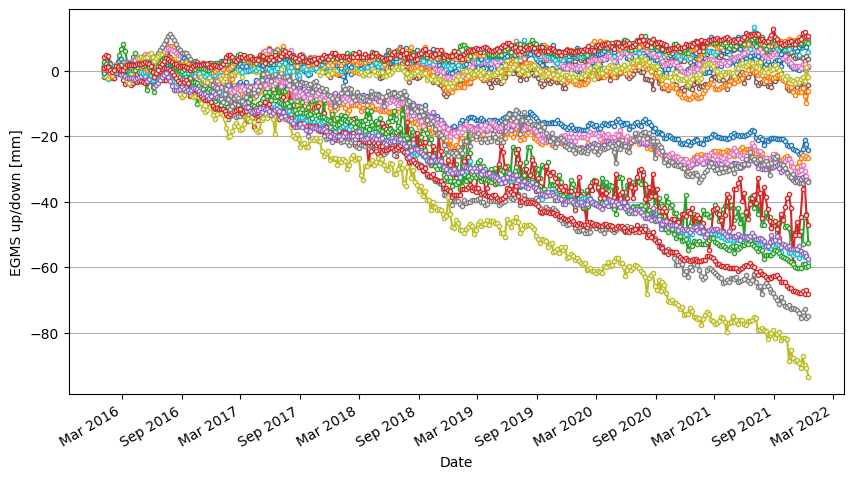

In [10]:
fig_EGMS_timeseries, axes = plt.subplots(nrows=1, ncols=1,facecolor='white', figsize=[10, 5])

for i in range(len(df_np)):
    axes.plot(acquisition_date_num,df_np[i,0:363], ".-", markerfacecolor="w")

axes.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(axes.get_xticklabels(), rotation=30, ha="right")
axes.set_xlabel('Date')
axes.set_ylabel('EGMS up/down [mm]')
axes.grid(visible=True,axis='y')
